In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [11]:
iris = load_iris()
iris_X = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_y = iris.target
iris_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
wine = load_wine()
wine_X = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_y = wine.target
wine_X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [45]:
boston = pd.read_csv("HousingData.csv").dropna()
boston_X = boston.drop("MEDV", axis=1)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [4]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist_X = mnist.data
mnist_y = mnist.target.astype(int)

# Линейные методы
### 1. Задание 1: Применение метода главных компонент (PCA).
Используйте набор данных "Iris" из sklearn.datasets. Примените PCA, чтобы снизить размерность до 2-х и визуализируйте результаты.


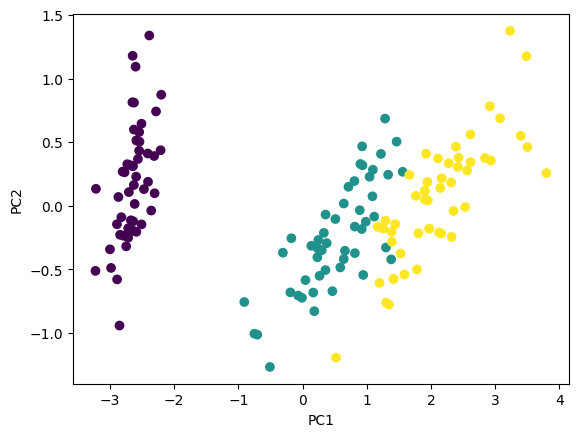

In [19]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_X)

plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Задание 2: Сравнение PCA и Factor Analysis.
Используйте набор данных "Wine" из sklearn.datasets. Примените PCA и Factor Analysis, чтобы снизить размерность до 2-х и визуализируйте различия в результатах.

PCA — геометрический метод для уменьшения размерности.

Factor Analysis — статистическая модель для поиска скрытых факторов.

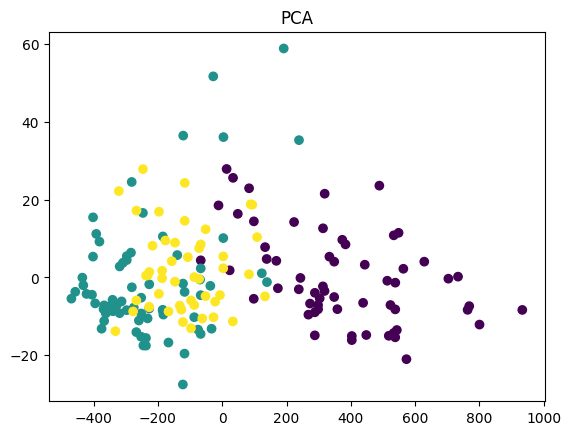

In [52]:
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_X)

plt.scatter(wine_pca[:,0], wine_pca[:,1], c=wine_y)
plt.title("PCA")
plt.show()

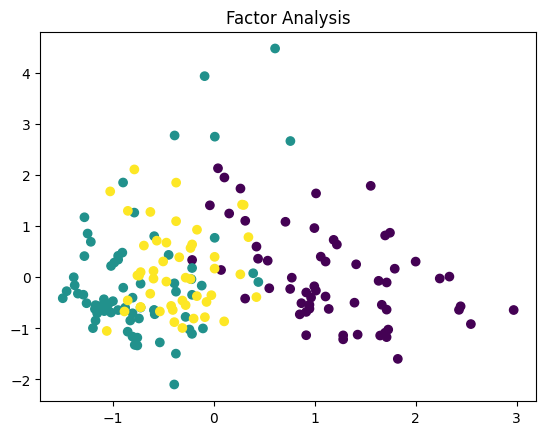

In [51]:
fa = FactorAnalysis(n_components=2)
wine_fa = fa.fit_transform(wine_X)

plt.scatter(wine_fa[:,0], wine_fa[:,1], c=wine_y)
plt.title("Factor Analysis")
plt.show()

### Задание 3: Исследование влияния предобработки данных на результаты PCA.    Используйте набор данных "Boston Housing" из sklearn.datasets. Примените различные методы предобработки (например, масштабирование, нормализацию) перед применением PCA и сравните полученные результаты.


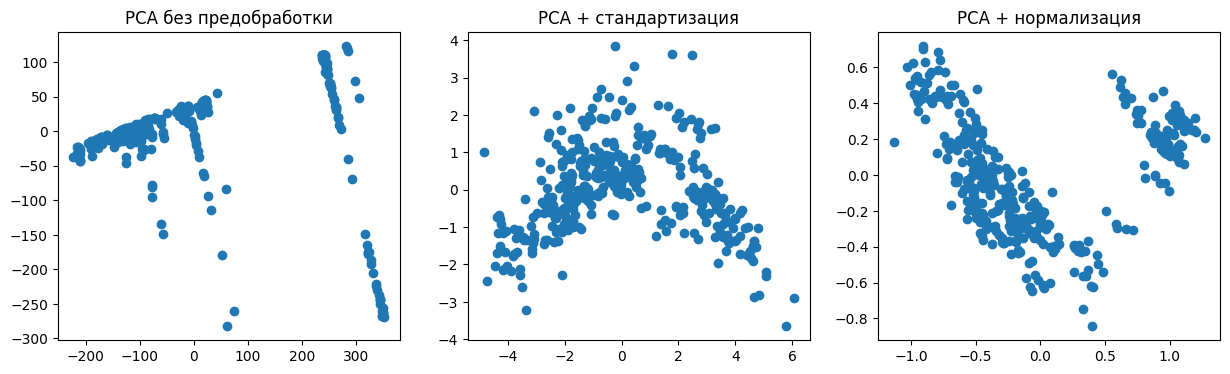

In [48]:
X_std = pd.DataFrame(StandardScaler().fit_transform(boston_X), columns=boston_X.columns)
X_norm = pd.DataFrame(MinMaxScaler().fit_transform(boston_X), columns=boston_X.columns)

pca = PCA(n_components=2)
raw_pca = pca.fit_transform(boston_X)
std_pca = pca.fit_transform(X_std)
norm_pca = pca.fit_transform(X_norm)


plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(raw_pca[:,0], raw_pca[:,1])
plt.title("PCA без предобработки")

plt.subplot(1,3,2)
plt.scatter(std_pca[:,0], std_pca[:,1])
plt.title("PCA + стандартизация")

plt.subplot(1,3,3)
plt.scatter(norm_pca[:,0], norm_pca[:,1])
plt.title("PCA + нормализация")

plt.show()

### Задание 4: Применение Disciminant Analysis.
Используйте набор данных "Iris" из sklearn.datasets. Примените Linear Discriminant Analysis (LDA) и Quadratic Discriminant Analysis (QDA), чтобы снизить размерность до 2-х и визуализируйте результаты.


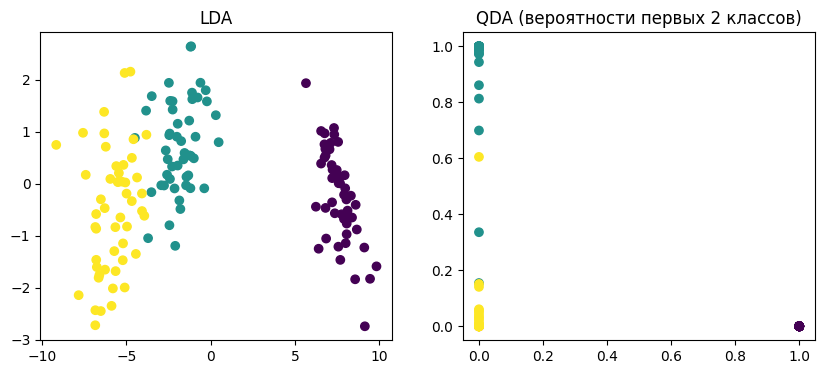

In [50]:
lda = LinearDiscriminantAnalysis(n_components=2)
iris_lda = lda.fit_transform(iris_X, iris_y)

qda = QuadraticDiscriminantAnalysis()
qda.fit(iris_X, iris_y)
iris_qda = qda.predict_proba(iris_X)[:, :2]

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(iris_lda[:,0], iris_lda[:,1], c=iris_y)
plt.title("LDA")

plt.subplot(1,2,2)
plt.scatter(iris_qda[:,0], iris_qda[:,1], c=iris_y)
plt.title("QDA")

plt.show()

 ### Задание 5: Сравнение PCA и LDA.
Используйте любой набор данных с классифицирующей моделью. Примените PCA и LDA и сравните, как влияют эти методы снижения размерности на эффективность классификации.


In [66]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3, random_state=42)

/tmp/ipython-input-1227980029.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


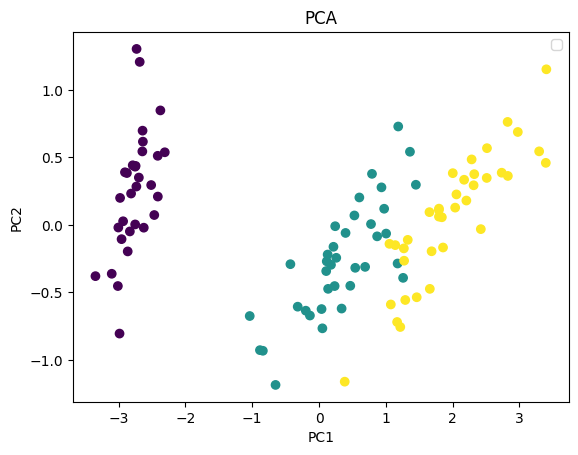

In [81]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf_pca = LogisticRegression()
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

In [80]:
display(f"accurancy: {acc_pca}")

'accurancy: 1.0'

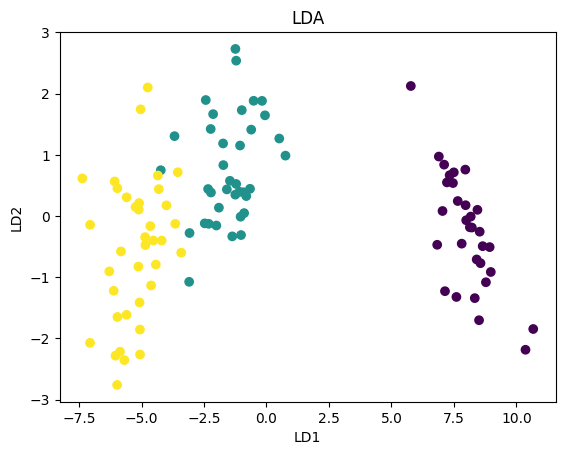

In [79]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

clf_lda = LogisticRegression()
clf_lda.fit(X_train_lda, y_train)
y_pred_lda = clf_lda.predict(X_test_lda)
acc_lda = accuracy_score(y_test, y_pred_lda)

plt.scatter(X_train_lda[:,0], X_train_lda[:,1], c=y_train)
plt.title("LDA")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()

In [78]:
display(f"accurancy: {acc_pca}")

'accurancy: 1.0'

### Задание 1: Применение метода t-SNE.
Используйте набор данных "Iris" из sklearn.datasets. Примените t-SNE, чтобы снизить размерность до 2-х, и визуализируйте результаты.


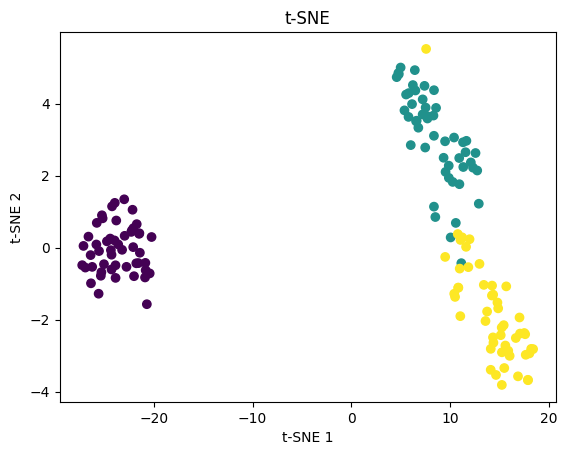

In [86]:
tsne = TSNE(n_components=2)
iris_tsne = tsne.fit_transform(iris_X)

plt.scatter(iris_tsne[:,0], iris_tsne[:,1], c=iris_y)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE")
plt.show()

### 2. Задание 2: Определение влияния параметров t-SNE.
Используйте тот же набор данных "Iris". Примените t-SNE с разными значениями параметров (например, число итераций, learning rate) и сравните полученные результаты.


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


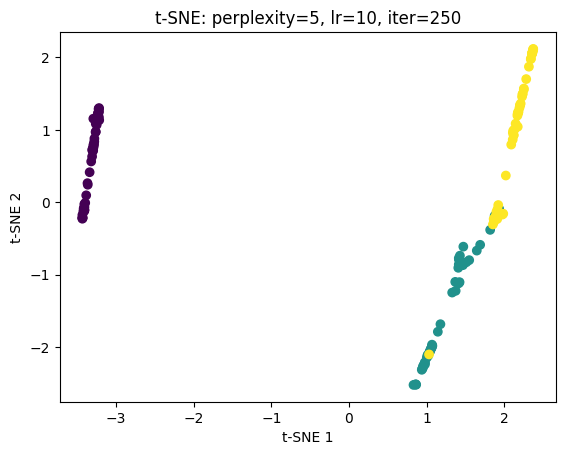

In [88]:
tsne1 = TSNE(n_components=2, perplexity=5, learning_rate=10, n_iter=250)
iris_tsne1 = tsne1.fit_transform(iris_X)
plt.scatter(iris_tsne1[:,0], iris_tsne1[:,1], c=iris_y)
plt.title("t-SNE: perplexity=5, lr=10, iter=250")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


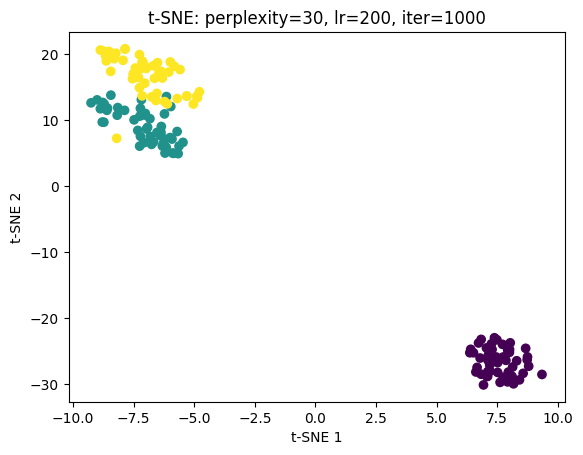

In [94]:
tsne2 = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000)
iris_tsne2 = tsne2.fit_transform(iris_X)
plt.scatter(iris_tsne2[:,0], iris_tsne2[:,1], c=iris_y)
plt.title("t-SNE: perplexity=30, lr=200, iter=1000")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


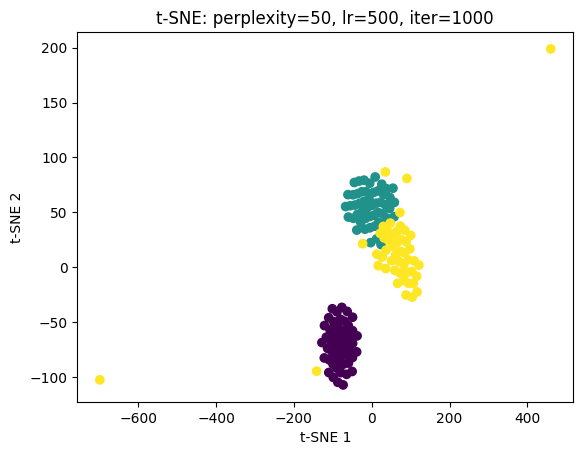

In [93]:
tsne3 = TSNE(n_components=2, perplexity=50, learning_rate=500, n_iter=1000)
iris_tsne3 = tsne3.fit_transform(iris_X)
plt.scatter(iris_tsne3[:,0], iris_tsne3[:,1], c=iris_y)
plt.title("t-SNE: perplexity=50, lr=500, iter=1000")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

### Задание 3: Сравнение t-SNE и PCA.
Используйте любой набор данных на ваше усмотрение. Примените PCA и t-SNE, чтобы снизить размерность до 2-х, и сравните разницы в результатах визуализации.


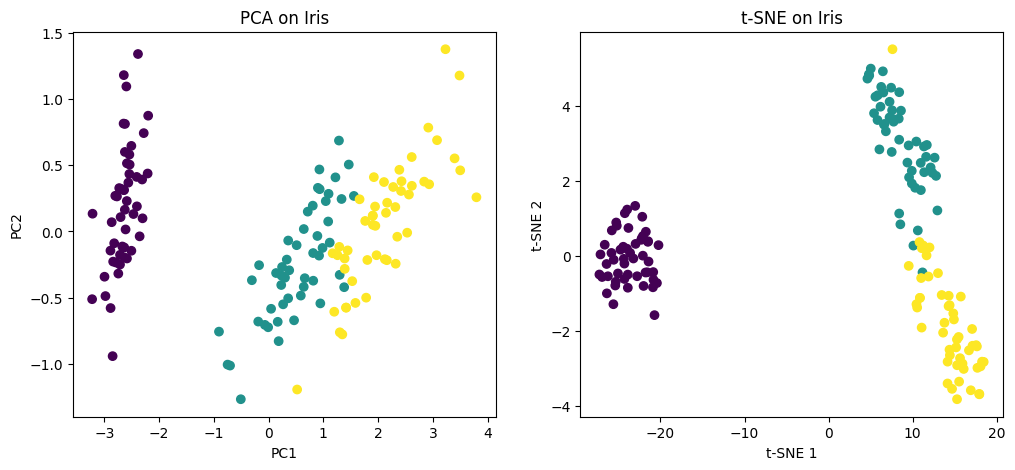

In [92]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.title("PCA on Iris")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(1,2,2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)
plt.title("t-SNE on Iris")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")

plt.show()

 ### Задание 4: Применение UMAP.
Используйте набор данных "MNIST" (например, содержащийся в sklearn.datasets). Примените UMAP для снижения размерности и визуализируйте результаты.


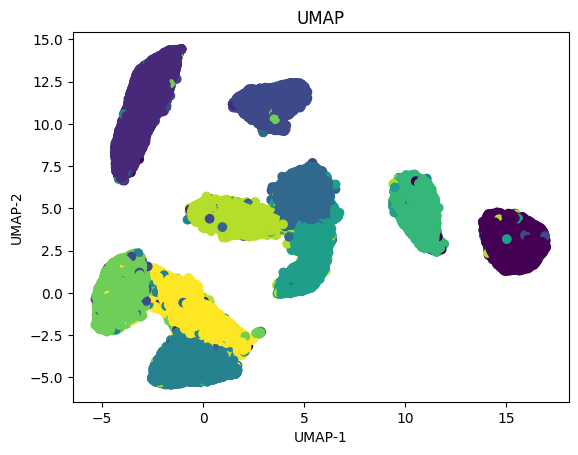

In [8]:
reducer = umap.UMAP(n_components=2)
X_umap = reducer.fit_transform(mnist_X)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=mnist_y)
plt.title("UMAP")
plt.xlabel("UMAP‑1")
plt.ylabel("UMAP‑2")
plt.show()

### Задание 5: Сравнение UMAP и t-SNE.
Используйте один и тот же набор данных для применения UMAP и t-SNE. Сравните влияние этих методов снижения размерности на визуальное разделение классов в данных.


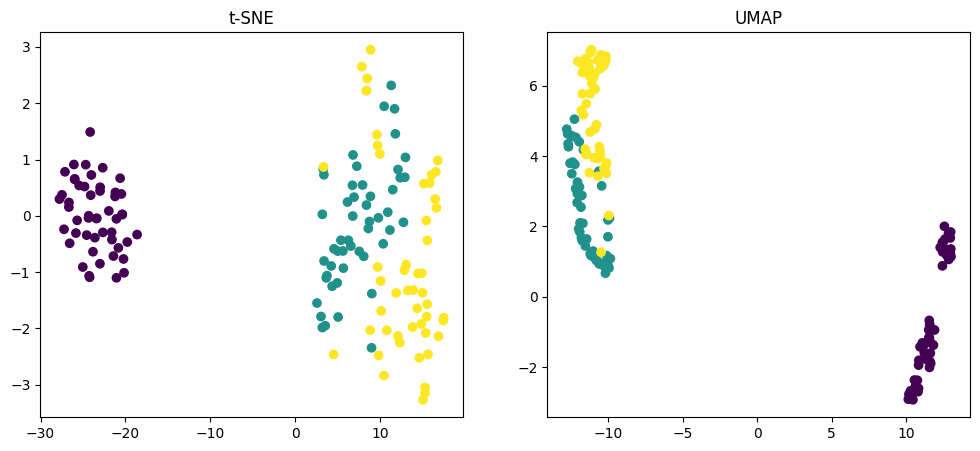

In [18]:
X_scaled = StandardScaler().fit_transform(iris_X)

tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1)
X_umap = umap_model.fit_transform(X_scaled)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1,2,1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris_y)
plt.title("t-SNE")

plt.subplot(1,2,2)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=iris_y)
plt.title("UMAP")

plt.show()